# EDA for Tel Aviv for Micro Mobility

* Check number of accidents per quarter
    * Compare to number of total accidents not related to micro mobility
    * Ratio of number accident
    * Pearson Correlation between length of BP and number of accidents for each quarter
* Bicycle Path Length in relation to Quarter area.
* Graph of number of accidents per quarter and total length of bicycle path in regards to time 
    * Normalize by population in Tel Aviv
    * Scatter plot x is length of BP, y number of accidents.
        * One general scatter plot
        * Each quarter a specific plot
    * Scatter plot but with accidents that are severe
* Compare BP length to streets length
* 

In [20]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

### Loading Quarters Data

In [21]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


#### Plotting Quarters

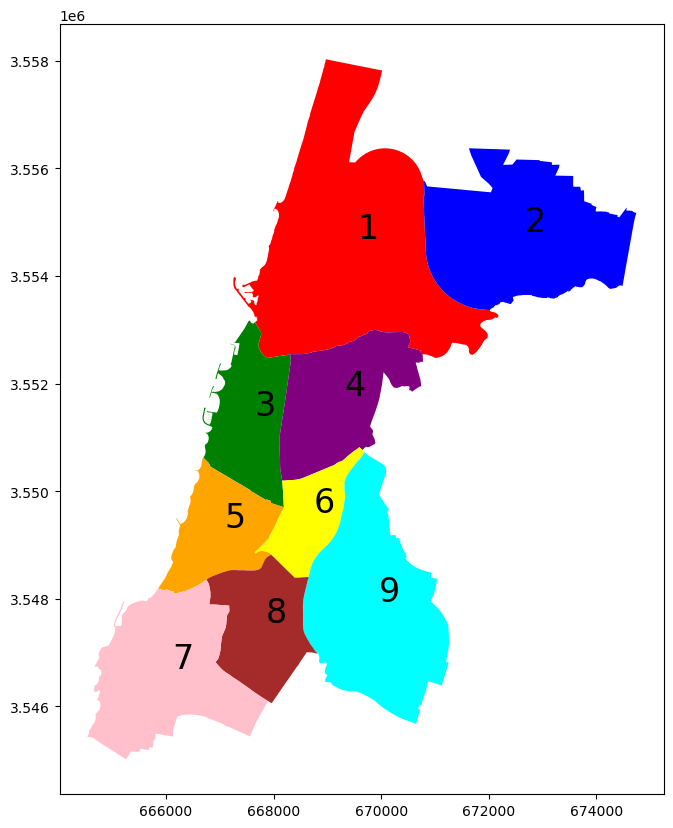

In [22]:
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()

### Loading i_m_h_ta_mm_gdf

In [23]:
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry
23,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-07-27 01:00:00,POINT (34.775 32.073)
87,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-10-07 01:30:00,POINT (34.772 32.062)
117,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-08-25 01:00:00,POINT (34.769 32.063)
246,2013007702,32013007702,3,3,2,נהג נפגע,0,9,40-44,1,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-08-25 07:45:00,POINT (34.782 32.088)
259,2013009458,12013009458,1,1,2,נהג נפגע,0,15,70-74,1,...,None,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-06-10 08:00:00,POINT (34.784 32.066)


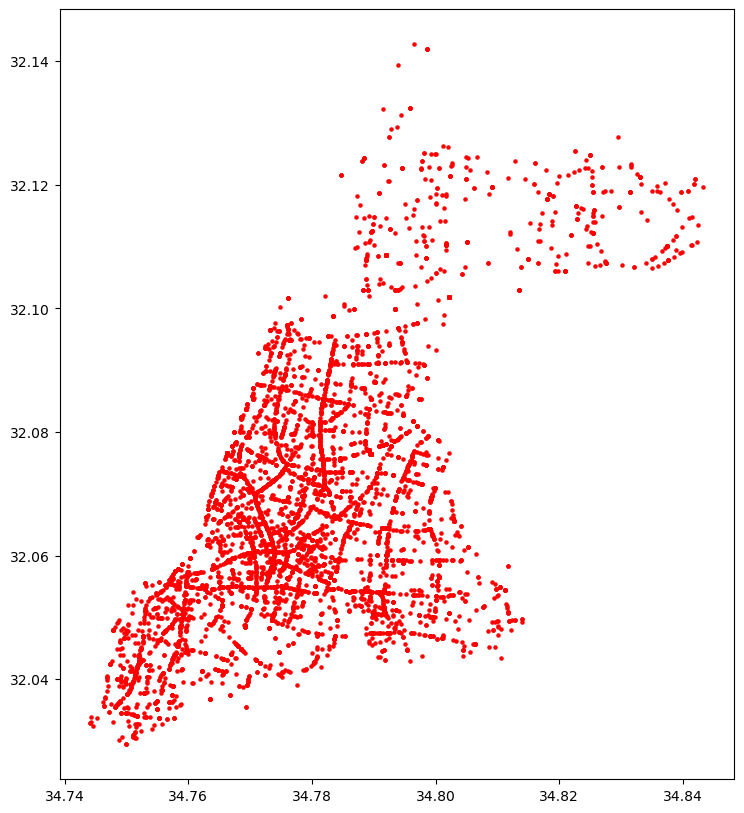

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )
plt.show()

### Loading BP

In [25]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

,oid_shvil,msorech,dateimport,width_x,direction_x,create_year,shemmikta,miflas_x,create_date,geometry,ms_orech,date_import,width_y,direction_y,bitzua,shem_mikta,miflas_y,date_created
0,1,95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (669823.985 3557373.860, 669855.549...",95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None
1,2,201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (669232.834 3555478.027, 669169.381...",201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None
2,3,696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (669232.637 3555478.023, 669249.025...",696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None
3,4,659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (669354.261 3555417.055, 669410.178...",659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (669946.350 3555344.516, 669962.261...",362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,30/06/2018


#### Plotting Quarters, Micro Mobility Accidents  and BP

In [26]:
i_m_h_ta_mm_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\itay8\AppData\Local\Temp\ipykernel_12420\2098530975.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


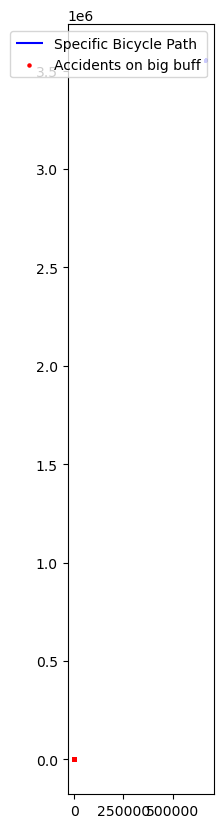

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()